# ⭐ How to install and manage packages and environments. ⭐ 

# Use `pip` to manage your packages

([but](https://realpython.com/pipenv-guide/) many [people](https://hackernoon.com/reaching-python-development-nirvana-bb5692adf30c) prefer [pipenv](https://medium.com/analytics-vidhya/why-pipenv-over-venv-for-python-projects-a51fb6e4f31e)).


In [13]:
!which pip

/Users/lizre/.pyenv/versions/3.7.3/bin/pip


Starts by searching [PyPI](https://pypi.org/): py package index

In [ ]:
!pip install pandas # Will also get dependencies needed for pandas
!pip list # Should now include pandas

dependencies and dependents:

In [86]:
pandas_deps = !pip show pandas 

In [89]:
pandas_deps

['Name: pandas',
 'Version: 1.3.2',
 'Summary: Powerful data structures for data analysis, time series, and statistics',
 'Home-page: https://pandas.pydata.org',
 'Author: The Pandas Development Team',
 'Author-email: pandas-dev@python.org',
 'License: BSD-3-Clause',
 'Location: /Users/lizre/.pyenv/versions/3.7.3/lib/python3.7/site-packages',
 'Requires: numpy, python-dateutil, pytz',
 'Required-by: cmdstanpy, mlflow, mlxtend, octopy, pandas-profiling, phik, prophet, researchpy, seaborn, sklearn-pandas, statsmodels, visions']

## Create requirements.txt to record your packages/dependencies

In terminal:

In [8]:
!pipreqs --force

INFO: Successfully saved requirements file in /Users/lizre/Downloads/learn-py/requirements.txt


- You'll see requirements.txt appear in src. It will not exactly match everything you `import` because pipreqs only includes ones not in standard library.
- Can also use `pip freeze > requirements.txt` but it is [harmful because it includes too many things.](https://medium.com/@tomagee/pip-freeze-requirements-txt-considered-harmful-f0bce66cf895); also [pypi says not to use pip freeze](https://pypi.org/project/pipreqs/).



In [10]:
!cat requirements.txt

pandas==1.3.2


To use:

In [12]:
!pip install -r requirements.txt

# Use `pyenv` to manage your Python version

## Why:
test on multiple versions

In [1]:
!which python

/Users/lizre/.pyenv/versions/3.7.3/bin/python


When you run a python command, your OS searches a list of directories to find an executable file with that name. The list of directories is in an environment variable called PATH:

In [3]:
!echo $PATH

/Users/lizre/.pyenv/versions/3.7.3/bin:/usr/local/Cellar/pyenv/2.2.4-1/libexec:/usr/local/Cellar/pyenv/2.2.4-1/plugins/python-build/bin:/Users/lizre/.pyenv/shims:/Users/lizre/.pyenv/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin


Each directory is separated by `:`.

pyenv lets you switch between versions of Python by changing your PATH.

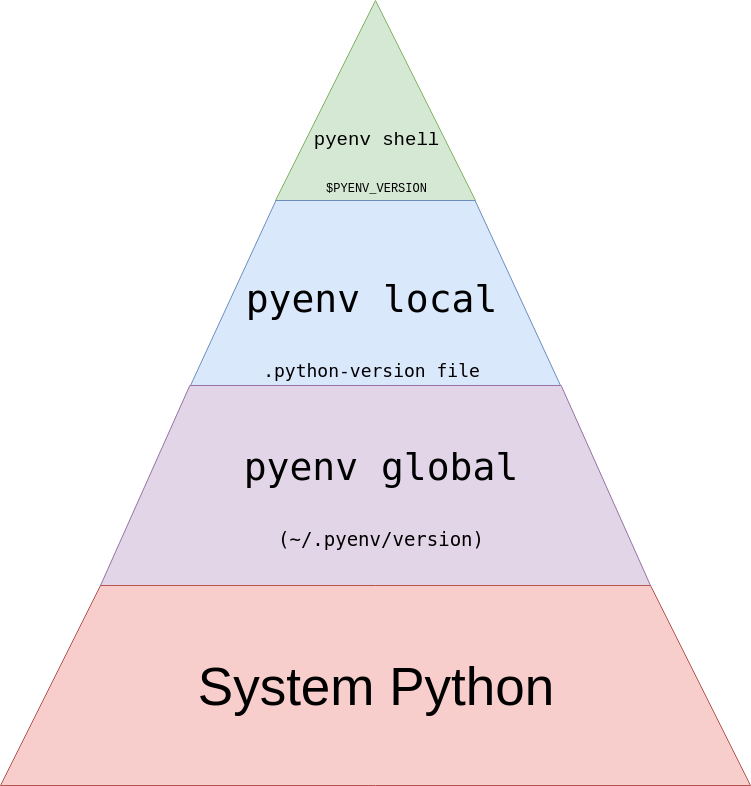

More [here](https://hackernoon.com/reaching-python-development-nirvana-bb5692adf30c), [here](https://realpython.com/intro-to-pyenv/), [here](https://github.com/pyenv/pyenv).

# Virtual environment

## Problem/motivation: all your projects share a single system environment

Your python interpreter and packages are just a bunch of files and folders.

When you `pip install`, it installs the package/dependency in the same place as your interpreter. This is your **system environment.**

### The system environment

Where is Python:

In [16]:
!which python

/Users/lizre/.pyenv/versions/3.7.3/bin/python


Inside that folder is `site-packages`, with all our packages:

In [106]:
my_system_python_packages = !cd ~/.pyenv/versions/3.7.3/lib/python3.7/site-packages && ls

In [107]:
import pandas as pd

my_system_python_packages = pd.Series(my_system_python_packages)

In [108]:
my_system_python_packages[200:215]

200                    itsdangerous
201    itsdangerous-2.0.1.dist-info
202                            jedi
203           jedi-0.18.0.dist-info
204                         jeepney
205         jeepney-0.6.0.dist-info
206                          jinja2
207                        jinjasql
208        jinjasql-0.1.8.dist-info
209                        jmespath
210       jmespath-0.10.0.dist-info
211                          joblib
212          joblib-1.0.1.dist-info
213                      jsonpickle
214      jsonpickle-2.0.0.dist-info
dtype: object

In [83]:
my_system_python_packages[303]

'pandas'

So each Python project on your computer has all their dependencies in the same place.


This is a problem when you have multiple projects that need different package versions. Each project will be looking at this same list of packages. Or if you share code with someone, the code will look in their system environment, which might differ from where the code was developed!


### Solution
A **virtual environment** is a separate version of this for each project. Each project has a folder with its own Python interpreter (`lib/python`), pip executable, and `site-packages`. 



**Aside: why not docker:**
<br>venv is only for Python dependencies. Docker is for an entire OS. Use when large-scale and/or dpeloying to a server.

## Make an env

[Beginners should start with venv](https://stackoverflow.com/questions/41573587/what-is-the-difference-between-venv-pyvenv-pyenv-virtualenv-virtualenvwrappe) (but many people prefer [pipenv](https://medium.com/analytics-vidhya/why-pipenv-over-venv-for-python-projects-a51fb6e4f31e)).


In [32]:
!python3 -m venv my_env

`my_env` will contain a copy of whatever python interpreter you used to make it. so make it specifically with `python3`.

In [15]:
!cd my_env && ls

bin        include    lib        pyvenv.cfg


Creates a folder called `my_env`, with Python, pip and `site-packages`:

In [ ]:
├── bin
│   ├── activate
│   ├── activate.csh
│   ├── activate.fish
│   ├── easy_install
│   ├── pip
│   ├── pip3
│   ├── python 
│   └── python3.7
├── include
├── lib
│   └── python3.7
│       └── site-packages
└── pyvenv.cfg

lib: a copy of Python.

## Enter/activate env

`activate` scripts tell your shell to use the venv’s Python executable and its `site-packages`, instead of the system ones.

so just run `activate`:

In [19]:
!source my_env/bin/activate 

### What activating does

Now prompt has env name:

![image](https://user-images.githubusercontent.com/38010821/153217272-690c3c2d-7035-474b-88ee-3ba1238a2d21.png)


And now, instead of looking for Python in `/Users/lizre/.pyenv/versions/3.7.3/bin/python`, it's looking in `my_env`:

In [92]:
!source my_env/bin/activate && which python

/Users/lizre/Downloads/learn-py/my_env/bin/python


And `my_env` is at the beginning of PATH, meaning the venv is the first directory used:

In [98]:
!source my_env/bin/activate && echo $PATH

/Users/lizre/Downloads/learn-py/my_env/bin:/Users/lizre/.pyenv/versions/3.7.3/bin:/usr/local/Cellar/pyenv/2.0.6/libexec:/usr/local/Cellar/pyenv/2.0.6/plugins/python-build/bin:/Users/lizre/.pyenv/shims:/Users/lizre/.pyenv/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin


Whereas outside the venv, `my_env` is not in PATH at all:

In [101]:
!echo $PATH

/Users/lizre/.pyenv/versions/3.7.3/bin:/usr/local/Cellar/pyenv/2.0.6/libexec:/usr/local/Cellar/pyenv/2.0.6/plugins/python-build/bin:/Users/lizre/.pyenv/shims:/Users/lizre/.pyenv/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin


### Install packages in the venv

`lib` &  `site-packages`: holds dependencies/packages you install in the venv:

In [34]:
!cd my_env/lib/python3.7/site-packages && ls

__pycache__                 pkg_resources
easy_install.py             setuptools
pip                         setuptools-40.8.0.dist-info
pip-19.0.3.dist-info


In [35]:
!source my_env/bin/activate && pip install numpy

  Using cached https://files.pythonhosted.org/packages/09/8c/ae037b8643aaa405b666c167f48550c1ce6b7c589fe5540de6d83e5931ca/numpy-1.21.5-cp37-cp37m-macosx_10_9_x86_64.whl
You are using pip version 19.0.3, however version 22.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Now numpy's there:

In [36]:
!cd my_env/lib/python3.7/site-packages && ls

__pycache__                 pip-19.0.3.dist-info
easy_install.py             pkg_resources
numpy                       setuptools
numpy-1.21.5.dist-info      setuptools-40.8.0.dist-info
pip


## Exit env

In [ ]:
!deactivate

Because a venv is just a folder, to delete one, just delete its folder.

## More

- [envs inside jupyter](https://stephen-odaibo.medium.com/docker-containers-python-virtual-environments-virtual-machines-d00aa9b8475)
- [use cookiecutter](https://www.datacamp.com/community/tutorials/python-developer-set-up) for scaffolding/templating